# Assignment -Playstore Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [2]:
df=pd.read_csv('E:/Python/playstore-analysis.csv')

In [3]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500.000000,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# Tasks
1. Data clean up – Missing value treatment

In [4]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### a. Drop records where rating is missing since rating is our target/study variable

In [5]:
df.Rating

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10836    4.5
10837    5.0
10838    NaN
10839    4.5
10840    4.5
Name: Rating, Length: 10841, dtype: float64

In [6]:
Missing_v=df.dropna(subset=['Rating'])

In [7]:
print(F"Missing Values :\n{Missing_v.isnull().sum()}")

Missing Values :
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64


## b. Check the null values for the Android Ver column.

In [8]:
df['Android Ver'].isnull().sum()

3

In [9]:
print(Missing_v[Missing_v.isna().any(axis=1)])

                                           App            Category  Rating  \
15             Learn To Draw Kawaii Characters      ART_AND_DESIGN     3.2   
1553                      Market Update Helper  LIBRARIES_AND_DEMO     4.1   
4453                    [substratum] Vacuum: P     PERSONALIZATION     4.4   
4490                      Pi Dark [substratum]     PERSONALIZATION     4.5   
6322                    Virtual DJ Sound Mixer               TOOLS     4.2   
7333                               Dots puzzle              FAMILY     4.0   
10472  Life Made WI-Fi Touchscreen Photo Frame                 1.9    19.0   

      Reviews          Size    Installs  Type     Price Content Rating  \
15         55   2700.000000      5,000+  Free         0       Everyone   
1553    20145     11.000000  1,000,000+  Free         0       Everyone   
4453      230  11000.000000      1,000+  Paid     $1.49       Everyone   
4490      189   2100.000000     10,000+  Free         0       Everyone   
6322 

### ii. Drop the 3rd record i.e. record for “Life Made WIFI …”

In [10]:
Wi=Missing_v.drop(10472)

In [11]:
fi = Wi[Wi["App"]=='Life Made WI-Fi Touchscreen Photo Frame']
print(fi)

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


### iii. Replace remaining missing values with the mode

In [12]:
import statistics
Android_list = Wi['Android Ver'].to_list()

M=[4.2,1.5,4.0,4.0]
Data_B = Wi.fillna(statistics.mode(M))

print(Data_B.loc[[4453]])
print()
print()
print(Data_B.loc[[4490]])

                         App         Category  Rating Reviews     Size  \
4453  [substratum] Vacuum: P  PERSONALIZATION     4.4     230  11000.0   

     Installs  Type  Price Content Rating           Genres   Last Updated  \
4453   1,000+  Paid  $1.49       Everyone  Personalization  July 20, 2018   

     Current Ver Android Ver  
4453         4.4         4.0  


                       App         Category  Rating Reviews    Size Installs  \
4490  Pi Dark [substratum]  PERSONALIZATION     4.5     189  2100.0  10,000+   

      Type Price Content Rating           Genres    Last Updated Current Ver  \
4490  Free     0       Everyone  Personalization  March 27, 2018         1.1   

     Android Ver  
4490         4.0  


### c. Current ver – replace with most common value

In [13]:
print(f"Missing Values :{Data_B['Current Ver'].isnull().sum()}")

Missing Values :0


So there are not any missing values in Current Ver

### 2. Data clean up – correcting the data types

#### a. Which all variables need to be brought to numeric types?

In [14]:
##Reviews and Size columns are need to be numeric types.

Data_B['Reviews'] = Data_B['Reviews'].astype(int)
Data_B['Size'] = Data_B['Size'].astype(int)


### b. Price variable – remove $ sign and convert to float

In [15]:
Data_B['Price'] = Data_B['Price'].str.replace('$', '')

C:\Users\giris\AppData\Local\Temp/ipykernel_28896/3257004002.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Data_B['Price'] = Data_B['Price'].str.replace('$', '')


In [16]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


### c. Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [17]:
Data_B['Installs'] = Data_B['Installs'].str.replace('+','')
Data_B['Installs'] = Data_B['Installs'].str.replace(',','')

C:\Users\giris\AppData\Local\Temp/ipykernel_28896/1907745134.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Data_B['Installs'] = Data_B['Installs'].str.replace('+','')


In [18]:
Data_B['Installs'] = Data_B['Installs'].astype(int)

In [19]:
Data_B.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### d. Convert all other identified columns to numeric

In [20]:
Data_B['Reviews'] = Data_B['Reviews'].astype(int)


In [21]:
Data_B

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600,500,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516,1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# 3. Sanity checks – check for the following and handle accordingly
a. Avg. rating should be between 1 and 5, as only these values are allowed on the play
store.

In [22]:
pd.unique(Data_B[['Rating']].values.ravel())


array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

Average ratings are in between 1 and 5.

### i. Are there any such records? Drop if so.

No records.

### b. Reviews should not be more than installs as only those who installed can review the
app.
i. Are there any such records? Drop if so.

In [23]:
df1 = pd.DataFrame()
df1 =Data_B[Data_B.Reviews <= Data_B.Installs]
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [24]:
df1.shape

(9359, 13)

# 4. Identify and handle outliers –
a. Price column

### i. Make suitable plot to identify outliers in price

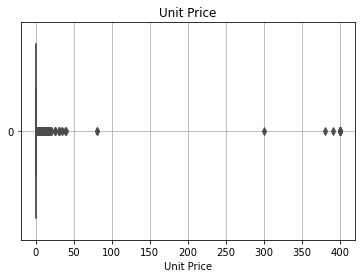

In [25]:
sns.boxplot(data=df1.Price,orient='h',color='blue')
plt.xlabel('Unit Price')
plt.title('Unit Price')
plt.grid(linestyle='-')
plt.show()

### ii. Do you expect apps on the play store to cost $200? Check out these cases

In [26]:
exp = Data_B[Data_B['Price'] == 200]
print(exp)

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


Originally in our dataset there was a Price column of $200,but due to null values it was removed after.

### iii. After dropping the useless records, make the suitable plot again to identify
outliers

To fullfill above contion let's remove whose price value is 0.

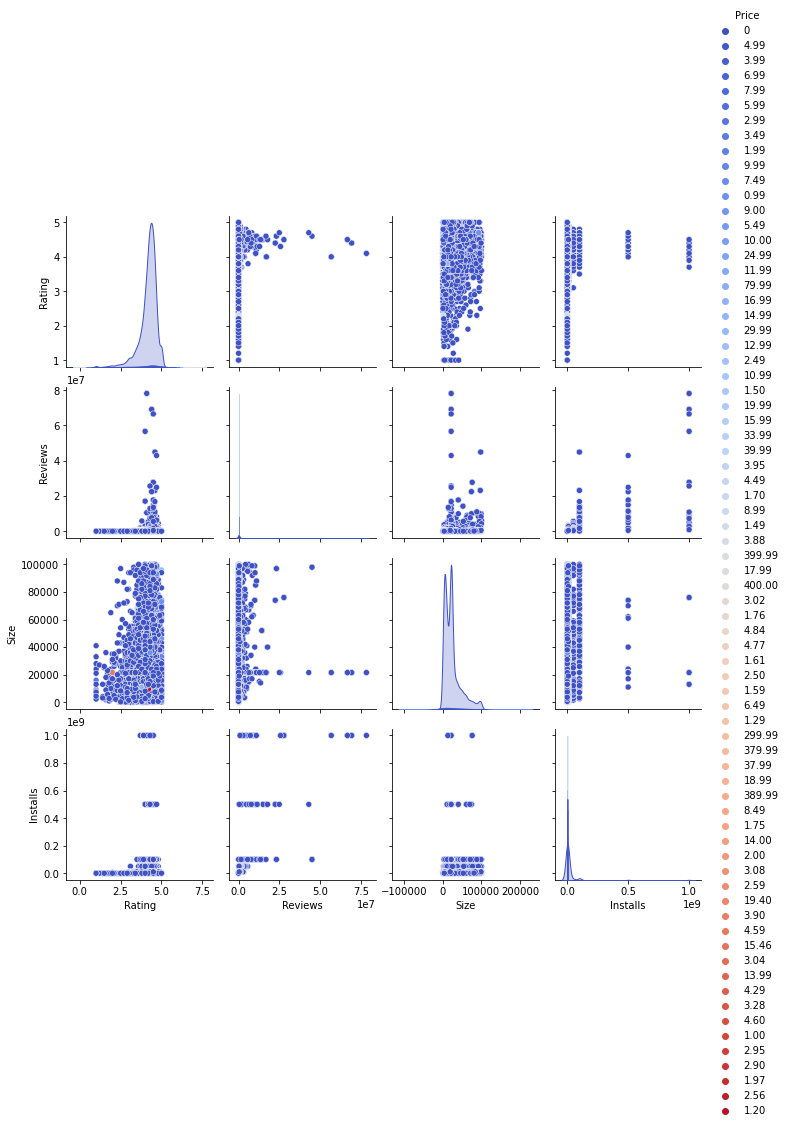

In [27]:
df_u=df1[df1['Price'] != 0]
sns.pairplot(df_u , hue = 'Price' , palette = 'coolwarm')
plt.show()

# b. Reviews column
i. Make suitable plot

C:\Users\giris\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Reviews', ylabel='Density'>

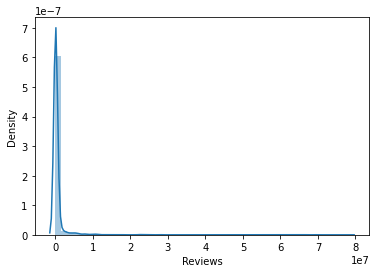

In [28]:
sns.distplot(df1.Reviews)

### ii. Limit data to apps with < 1 Million reviews

In [29]:
lim_data= df1[df1['Reviews'] < 1000000]
lim_data.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [30]:
lim_data.shape

(8655, 13)

There are 8655 rows of limited data to apps with < 1 Million reviews

### i. What is the 95th percentile of the installs?

In [31]:
per= df1.Installs.quantile(0.95)
print(per)

100000000.0


Here we can see 95th percentile of the installs = 100000000.0

### ii. Drop records having a value more than the 95th percentile

In [32]:
perc = df1.Installs.quantile() > per
print(perc)

False


There are no any values more than 95th percentile

# Data analysis to answer business questions

##### 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower
values?

C:\Users\giris\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


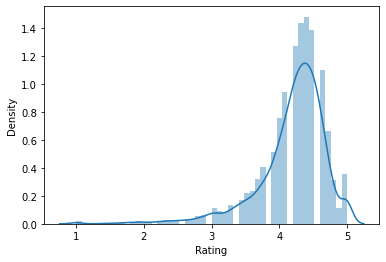

In [33]:
sns.distplot(df1['Rating'])
plt.show()

a. How do you explain this?

A left skewed distribution is called a negatively skewed distribution, because it’s long tail is on the negative direction on a number line.
We can see mean on the left of peak.

In negative skewness 
mean is less than the mode
median is less than the mode
mean is less than median
So from above visualisation we can see most of the rating is between 4 to 5.

### b. What is the implication of this on your analysis?

Real life distributions are usually skewed. 
If there are too much skewness in the data, then statistical model might not work.
So in skewed data, the tail region may act as an outlier for the statistical model.
So there is a necessity to transform the skewed data to close enough to a Gaussian distribution or Normal distribution. This will allow us to try more number of statistical model.

Conclusion:
If we have a skewed data then it may harm our results. So, in order to use a skewed data we have to apply a log transformation over the whole set of values to discover patterns in the data and make it usable for the statistical model.

# 6. What are the top Content Rating values?

In [34]:
df1['Content Rating'].nunique()

6

In [35]:
print("Content Rating=",df1.Rating.unique())

Content Rating= [4.1 3.9 4.7 4.5 4.3 4.4 3.8 4.2 4.6 3.2 4.  4.8 4.9 3.6 3.7 3.3 3.4 3.5
 3.1 5.  2.6 3.  1.9 2.5 2.8 2.7 1.  2.9 2.3 2.2 1.7 2.  1.8 2.4 1.6 2.1
 1.4 1.5 1.2]


In [36]:
df1['Content Rating'].value_counts()

Everyone           7414
Teen               1083
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

### a. Are there any values with very few records?

Yes,here we can see Adults only 18+ has only 3 records and unrated content as only 1.

#### b. If yes, drop those as they won’t help in the analysis

In [37]:
Adult_rating = df1[df1['Content Rating'] == 'Adults only 18+'].index.to_list()
unrated =df1[df1['Content Rating'] == 'Unrated'].index.to_list()
df1.drop(Adult_rating, inplace = True)
df1.drop(unrated, inplace = True)
df1['Content Rating'].value_counts()

C:\Users\giris\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Everyone        7414
Teen            1083
Mature 17+       461
Everyone 10+     397
Name: Content Rating, dtype: int64

### 7. Effect of size on rating

a. Make a joinplot to understand the effect of size on rating

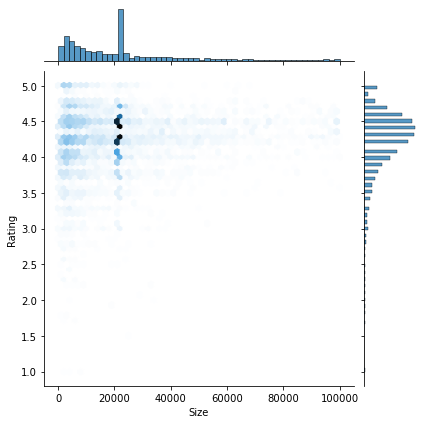

In [38]:
sns.jointplot(x=df1['Size'],y=df1['Rating'],data=df1,kind='hex')
plt.show()

### b. Do you see any patterns?
c. How do you explain the pattern?

From the plotted jointplot we can make inference that app size do matters alot on rating.
We can see for the app sizes between 20 MB to 40 MB rating lies between 3.5 to 5.
So less the size of an app more the rating for that app.

### 8. Effect of price on rating

a. Make a jointplot (with regression line)

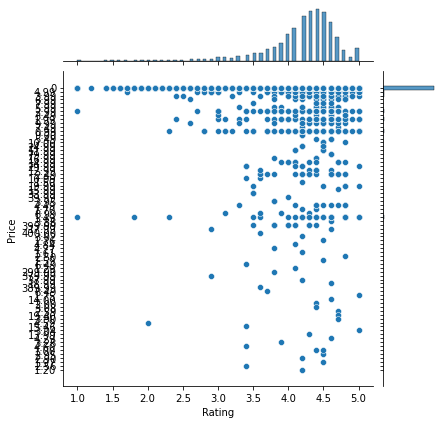

In [39]:
sns.jointplot(x ="Rating" , y = "Price" ,data = df1)
plt.show()

#### b. What pattern do you see?
c. How do you explain the pattern?

As the price increases rating also increases.

### d. Replot the data, this time with only records with price > 0

In [43]:
b=df1[df1["Price"]!=0]

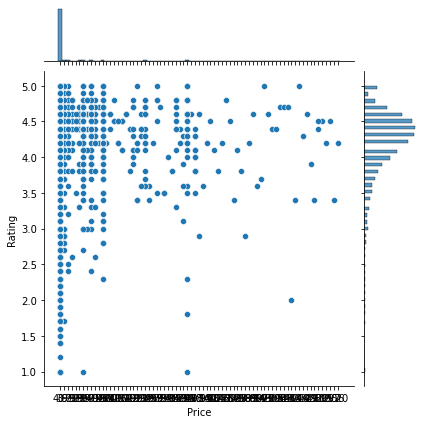

In [64]:
sns.jointplot(x ="Price" , y = "Rating" ,data = b )
plt.show()

###### e. Does the pattern change?
f. What is your overall inference on the effect of price on the rating

Yes, On limiting the record with Price greater than 0, the overall pattern changed a slight there is weakly Negative Correlation between Price and Rating.

Here increasing prices, doesn't have signifcant effect on Higher Rating. 
For Higher Price, Rating is High and it is almost constant - greater than 4

# 9. Look at all the numeric interactions together –
a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

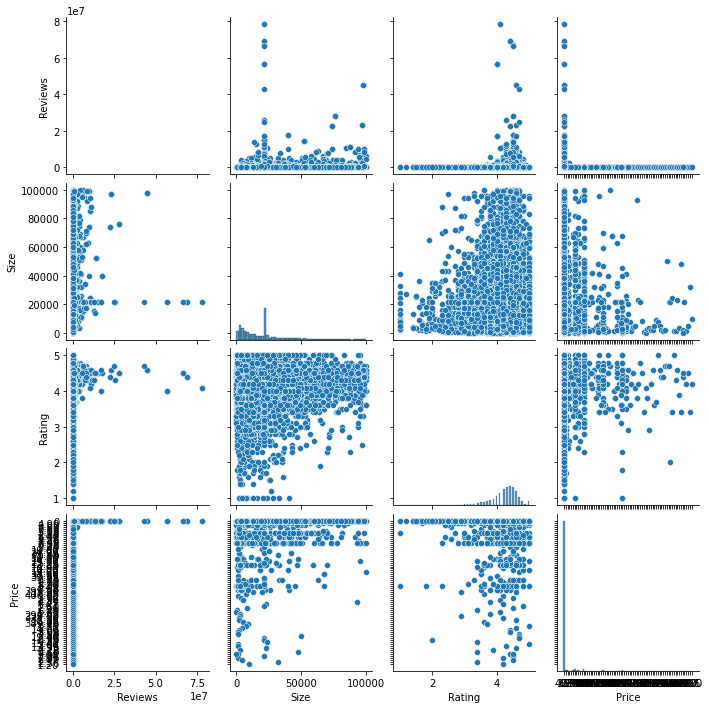

In [66]:
sns.pairplot(df1, vars=['Reviews', 'Size', 'Rating', 'Price'])
plt.show()

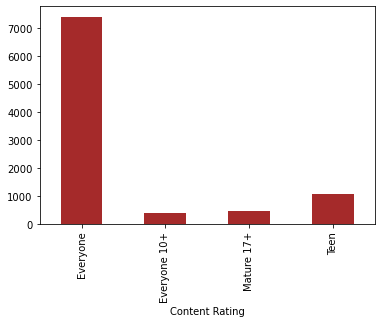

In [75]:
df1.groupby(['Content Rating'])['Rating'].count().plot.bar(color="brown")
plt.show()

### b. Which metric would you use? Mean? Median? Some other quantile?

I would use Median in this case as i am having Outliers in Rating. 
As in the case of Outliers , median is the best measure of central tendency.

### c. Choose the right metric and plot

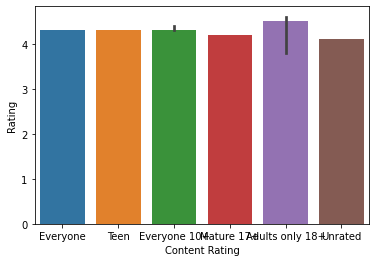

In [73]:
sns.barplot(y='Rating', x='Content Rating', data=df ,estimator=np.median);

# 11. Content rating vs. size vs. rating – 3 variables at a time

a. Create 5 buckets (20% records in each) based on Size

In [78]:
bins=[0, 20000, 40000, 60000, 80000, 100000]
df1['Buck_Size'] = pd.cut(df1['Size'], bins, labels=['0-20k','20k-40k','40k-60k','60k-80k','80k-100k'])
pd.pivot_table(df1, values='Rating', index='Buck_Size', columns='Content Rating')

C:\Users\giris\AppData\Local\Temp/ipykernel_28896/70072743.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Buck_Size'] = pd.cut(df1['Size'], bins, labels=['0-20k','20k-40k','40k-60k','60k-80k','80k-100k'])


Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Buck_Size,,,,
0-20k,4.148721,4.247561,4.015183,4.187047
20k-40k,4.228845,4.197802,4.195109,4.237590
40k-60k,4.192505,4.265957,4.202222,4.270896
60k-80k,4.271774,4.374000,4.190909,4.291045
80k-100k,4.280000,4.405556,4.252632,4.314815


### b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each
combination

In [82]:
CR =pd.pivot_table(df1, values='Rating', index='Buck_Size', columns='Content Rating', aggfunc=lambda x:np.quantile(x,0.2))
CR

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Buck_Size,,,,
0-20k,3.8,4.02,3.5,3.9
20k-40k,4.0,4.00,4.0,4.0
40k-60k,3.9,4.10,4.1,4.0
60k-80k,4.0,4.20,4.0,4.0
80k-100k,4.1,4.30,4.0,4.1


# c. Make a heatmap of this

### i. Annotated

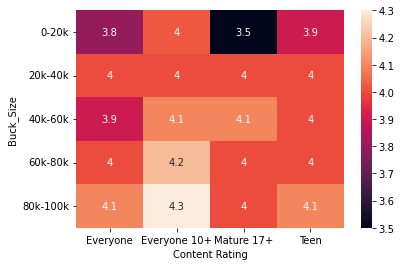

In [84]:
sns.heatmap(CR, annot = True)
plt.show()

### ii. Greens color map

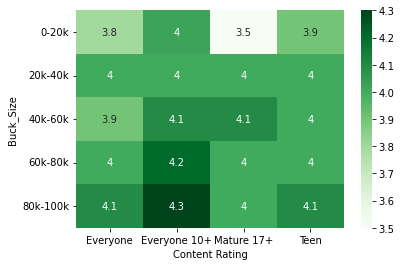

In [85]:
sns.heatmap(CR, annot=True, cmap='Greens')
plt.show()

# d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

From the analysis, it can be observed that most of havier apps seems to be more preferred in all the Content Ratings.
Because apps with size 40k-60k and 80k-100k have got the highest rating in all cateegories. 
So, in general we can conclude that heavier apps are preferred in all categories.

